# DiploDatos 2020 - Coronavirus en Argentina

## En este Notebook se realizará el proceso de Limpieza, Pre-Procesado y Feature Engineer sobre el Dataset Covid19Casos

In [1]:
### Aumentar el ancho del notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

Veamos unos sencillos (e incompletos) **ejemplos**.

### Carga de datos

In [2]:
# Importamos librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Experimentación con el dataset: Covid19Casos

##### Dataset - Covid19Casos
- Source: http://datos.salud.gob.ar/dataset/covid-19-casos-registrados-en-la-republica-argentina/archivo/fd657d02-a33a-498b-a91b-2ef1a68b8d16

In [3]:
url = 'https://sisa.msal.gov.ar/datos/descargas/covid-19/files/Covid19Casos.csv'

df = pd.read_csv(url, error_bad_lines=False)

In [4]:
dataset = df.copy(deep=True)

In [5]:
dataset.head(10)

,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,...,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion
0,1000000,M,53.0,Años,Argentina,CABA,SIN ESPECIFICAR,Buenos Aires,NaN,2020-06-01,...,NaN,NO,6,Privado,Caso Descartado,Descartado,2,2020-06-09,0,2020-10-30
1,1000002,M,21.0,Años,Argentina,Buenos Aires,La Matanza,Buenos Aires,NaN,2020-06-01,...,NaN,NO,6,Público,Caso Descartado,Descartado,6,2020-06-01,427,2020-10-30
2,1000003,F,40.0,Años,Argentina,Córdoba,Capital,Córdoba,2020-05-24,2020-06-01,...,NaN,NO,14,Privado,Caso Descartado,Descartado,14,2020-06-01,14,2020-10-30
3,1000005,F,58.0,Años,Argentina,Mendoza,Las Heras,Mendoza,NaN,2020-06-01,...,NaN,NO,50,Público,Caso Descartado,Descartado,50,2020-06-01,49,2020-10-30
4,1000006,M,28.0,Años,Argentina,Buenos Aires,Malvinas Argentinas,Buenos Aires,2020-05-30,2020-06-01,...,NaN,NO,6,Público,Caso sospechoso - No Activo - Con muestra sin ...,Sospechoso,6,NaN,515,2020-10-30
5,1000007,M,26.0,Años,Argentina,Formosa,Patiño,Formosa,NaN,2020-06-01,...,NaN,NO,34,Público,Caso confirmado por laboratorio - No Activo po...,Confirmado,34,2020-06-25,35,2020-10-30
6,1000008,F,69.0,Años,Argentina,CABA,SIN ESPECIFICAR,CABA,2020-05-31,2020-06-01,...,NaN,NO,2,Privado,Caso Descartado,Descartado,2,2020-06-01,0,2020-10-30
7,1000009,M,73.0,Años,Argentina,Buenos Aires,Esteban Echeverría,Buenos Aires,2020-05-31,2020-06-01,...,NaN,NO,6,Privado,Caso Descartado,Descartado,6,2020-06-02,260,2020-10-30
8,1000010,M,7.0,Años,Argentina,CABA,COMUNA 07,CABA,NaN,2020-06-01,...,NaN,NO,2,Público,Caso confirmado por laboratorio - No activo (p...,Confirmado,2,2020-06-01,7,2020-10-30
9,1000011,M,42.0,Años,Argentina,Santa Fe,Rosario,Santa Fe,NaN,2020-06-01,...,NaN,NO,82,Público,Caso Descartado,Descartado,82,2020-06-01,84,2020-10-30


In [6]:
dataset.shape

(2807277, 25)

In [7]:
dataset.isnull().count()

id_evento_caso                      2807277
sexo                                2807277
edad                                2807277
edad_años_meses                     2807277
residencia_pais_nombre              2807277
residencia_provincia_nombre         2807277
residencia_departamento_nombre      2807277
carga_provincia_nombre              2807277
fecha_inicio_sintomas               2807277
fecha_apertura                      2807277
sepi_apertura                       2807277
fecha_internacion                   2807277
cuidado_intensivo                   2807277
fecha_cui_intensivo                 2807277
fallecido                           2807277
fecha_fallecimiento                 2807277
asistencia_respiratoria_mecanica    2807277
carga_provincia_id                  2807277
origen_financiamiento               2807277
clasificacion                       2807277
clasificacion_resumen               2807277
residencia_provincia_id             2807277
fecha_diagnostico               

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2807277 entries, 0 to 2807276
Data columns (total 25 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   id_evento_caso                    int64  
 1   sexo                              object 
 2   edad                              float64
 3   edad_años_meses                   object 
 4   residencia_pais_nombre            object 
 5   residencia_provincia_nombre       object 
 6   residencia_departamento_nombre    object 
 7   carga_provincia_nombre            object 
 8   fecha_inicio_sintomas             object 
 9   fecha_apertura                    object 
 10  sepi_apertura                     int64  
 11  fecha_internacion                 object 
 12  cuidado_intensivo                 object 
 13  fecha_cui_intensivo               object 
 14  fallecido                         object 
 15  fecha_fallecimiento               object 
 16  asistencia_respiratoria_mecanica  ob

In [9]:
dataset['fecha_inicio_sintomas'] = pd.to_datetime(dataset['fecha_inicio_sintomas'], format='%Y-%m-%d')
dataset['fecha_apertura'] = pd.to_datetime(dataset['fecha_apertura'], format='%Y-%m-%d')
dataset['fecha_internacion'] = pd.to_datetime(dataset['fecha_internacion'], format='%Y-%m-%d')
dataset['fecha_cui_intensivo'] = pd.to_datetime(dataset['fecha_cui_intensivo'], format='%Y-%m-%d')
dataset['fecha_fallecimiento'] = pd.to_datetime(dataset['fecha_fallecimiento'], format='%Y-%m-%d')
dataset['fecha_diagnostico'] = pd.to_datetime(dataset['fecha_diagnostico'], format='%Y-%m-%d')

## Limpieza, Preprocesado y Feature Engineering

In [10]:
dataset.convert_dtypes().dtypes

id_evento_caso                               Int64
sexo                                        string
edad                                         Int64
edad_años_meses                             string
residencia_pais_nombre                      string
residencia_provincia_nombre                 string
residencia_departamento_nombre              string
carga_provincia_nombre                      string
fecha_inicio_sintomas               datetime64[ns]
fecha_apertura                      datetime64[ns]
sepi_apertura                                Int64
fecha_internacion                   datetime64[ns]
cuidado_intensivo                           string
fecha_cui_intensivo                 datetime64[ns]
fallecido                                   string
fecha_fallecimiento                 datetime64[ns]
asistencia_respiratoria_mecanica            string
carga_provincia_id                           Int64
origen_financiamiento                       string
clasificacion                  

### Sexo

F     1428852
M     1369377
NR       9048
Name: sexo, dtype: int64

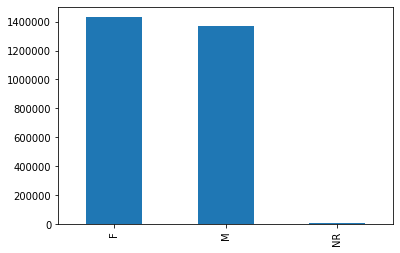

In [11]:
dataset.sexo.value_counts().plot.bar()
dataset.sexo.value_counts()

In [12]:
### One Hot Encoder
dataset = pd.concat([dataset, pd.get_dummies(dataset['sexo'], prefix='sexo')],axis=1).drop(['sexo'], axis=1)

In [13]:
dataset = dataset.rename(columns={"sexo_F": "sexo_f", 
                                  "sexo_M": "sexo_m",
                                  "sexo_NR": "sexo_nr"})

### Edad

In [14]:
# Paso meses a años (cuando la edad está expresada en meses)
dataset['edad'].loc[dataset.edad_años_meses == 'Meses'] = 0

/home/lucas/DIPLODATOS/.venv/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [15]:
# Eliminamos la columna edad_años_meses
dataset.drop(['edad_años_meses'], axis=1, inplace=True)

### Lugares

#### País

Argentina               2692359
SIN ESPECIFICAR          114452
Paraguay                    118
Bolivia                      97
Chile                        55
Brasil                       51
Uruguay                      36
Perú                         23
Italia                       15
Alemania                      9
Venezuela                     9
España                        8
Francia                       8
China                         5
Reino Unido                   4
Colombia                      4
EE.UU.                        3
Australia                     3
Austria                       2
Ecuador                       2
Filipinas                     2
Malasia                       2
Panamá                        1
Países Bajos                  1
Canadá                        1
Portugal                      1
Irlanda                       1
Líbano                        1
Bélgica                       1
República Dominicana          1
Ucrania                       1
Polonia 

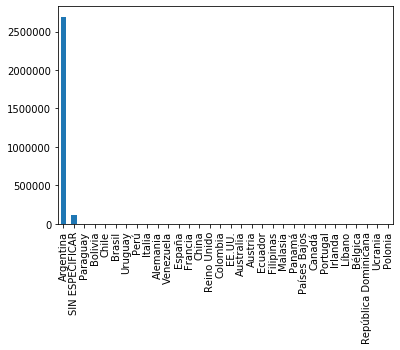

In [16]:
dataset.residencia_pais_nombre.value_counts().plot.bar()
dataset.residencia_pais_nombre.value_counts()

In [17]:
cant_total = dataset.shape[0]
cant_arg = dataset[dataset.residencia_pais_nombre == "Argentina"].shape[0]
porcentaje = (cant_arg * 100) / cant_total

print('Cantidad de registros donde el país de residencia es Argentina: {0} ({1}%)'.format(cant_arg, round(porcentaje, 2)))

Cantidad de registros donde el país de residencia es Argentina: 2692359 (95.91%)


- Se conservan sólo los datos de personas residentes en Argentina

In [18]:
dataset.drop(dataset[dataset.residencia_pais_nombre != "Argentina"].index, inplace=True)

In [19]:
#Elimino la columna país porque todos los registros tienen el mismo valor
dataset.drop(['residencia_pais_nombre'], axis=1, inplace=True)

#### carga_provincia_nombre

In [20]:
cant_iguales = dataset[dataset.residencia_provincia_nombre == dataset.carga_provincia_nombre].shape[0]
porcentaje = (cant_iguales * 100) / cant_total

print('Cantidad de registros donde la provincia de residencia es igual a la de carga: {0} ({1}%)'.format(cant_iguales, round(porcentaje, 2)))

Cantidad de registros donde la provincia de residencia es igual a la de carga: 2324566 (82.81%)


Buenos Aires           1006866
CABA                    709718
Santa Fe                183278
Córdoba                 153474
Mendoza                  96682
Tucumán                  89585
Chaco                    60896
Jujuy                    44650
Río Negro                43310
Neuquén                  40611
Salta                    39154
Santiago del Estero      34907
Entre Ríos               33511
Chubut                   26278
San Luis                 20990
Tierra del Fuego         20221
La Rioja                 20016
Santa Cruz               19542
Corrientes               14343
La Pampa                 13430
Catamarca                 8850
Misiones                  5465
San Juan                  5272
Formosa                   1310
Name: carga_provincia_nombre, dtype: int64

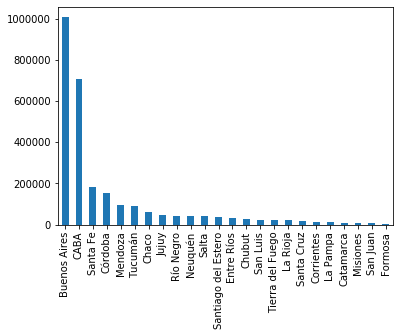

In [21]:
dataset.carga_provincia_nombre.value_counts().plot.bar()
dataset.carga_provincia_nombre.value_counts()

In [22]:
# Feature engineer => agregar columna que tenga un 1 si la pcia de carga es la misma y un 0 sino
dataset['pcia_rec_eq_pcia_car'] = (dataset['residencia_provincia_nombre'] == dataset['carga_provincia_nombre'])
dataset['pcia_rec_eq_pcia_car'] = dataset['pcia_rec_eq_pcia_car'].astype(int)

In [23]:
dataset[['id_evento_caso', 'residencia_provincia_nombre', 'carga_provincia_nombre', 'pcia_rec_eq_pcia_car']]

,id_evento_caso,residencia_provincia_nombre,carga_provincia_nombre,pcia_rec_eq_pcia_car
0,1000000,CABA,Buenos Aires,0
1,1000002,Buenos Aires,Buenos Aires,1
2,1000003,Córdoba,Córdoba,1
3,1000005,Mendoza,Mendoza,1
4,1000006,Buenos Aires,Buenos Aires,1
...,...,...,...,...
2807272,999994,Tierra del Fuego,Tierra del Fuego,1
2807273,999995,Formosa,Formosa,1
2807274,999996,CABA,CABA,1
2807275,999997,CABA,Córdoba,0


In [24]:
#Elimino la columna país porque todos los registros tienen el mismo valor
dataset.drop(['carga_provincia_nombre'], axis=1, inplace=True)

#### Provincia

Buenos Aires           1259514
CABA                    442788
Santa Fe                182003
Córdoba                 156128
Mendoza                  96801
Tucumán                  89359
Chaco                    60794
Río Negro                44433
Jujuy                    44320
Neuquén                  39840
Salta                    39615
Santiago del Estero      35243
Entre Ríos               34845
Chubut                   27397
San Luis                 21201
Tierra del Fuego         20558
Santa Cruz               19955
La Rioja                 19919
Corrientes               15329
La Pampa                 13794
Catamarca                 8907
Misiones                  7014
San Juan                  5759
SIN ESPECIFICAR           5135
Formosa                   1708
Name: residencia_provincia_nombre, dtype: int64

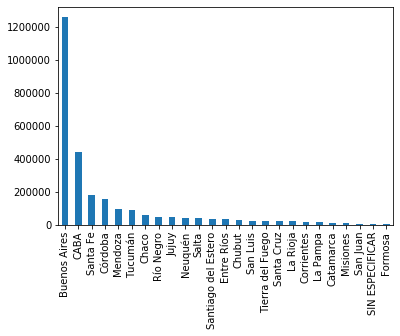

In [25]:
dataset.residencia_provincia_nombre.value_counts().plot.bar()
dataset.residencia_provincia_nombre.value_counts()

In [26]:
dataset.drop(dataset[dataset.residencia_provincia_nombre == "SIN ESPECIFICAR"].index, inplace=True)

In [27]:
### One Hot Encoder
dataset = pd.concat([dataset, pd.get_dummies(dataset['residencia_provincia_nombre'], prefix='residencia_provincia')],axis=1).drop(['residencia_provincia_nombre'], axis=1)

In [28]:
# Rename columns 

columns = {
    'residencia_provincia_Buenos Aires': 'residencia_provincia_buenos_aires',
    'residencia_provincia_CABA': 'residencia_provincia_caba',
    'residencia_provincia_Catamarca': 'residencia_provincia_catamarca',
    'residencia_provincia_Chaco': 'residencia_provincia_chaco',
    'residencia_provincia_Chubut': 'residencia_provincia_chubut',
    'residencia_provincia_corrientes': 'residencia_provincia_corrientes',
    'residencia_provincia_Córdoba': 'residencia_provincia_cordoba',
    'residencia_provincia_Entre Ríos': 'residencia_provincia_entre_rios',
    'residencia_provincia_Formosa': 'residencia_provincia_formosa',
    'residencia_provincia_Jujuy': 'residencia_provincia_jujuy',
    'residencia_provincia_La Pampa': 'residencia_provincia_la_pampa',
    'residencia_provincia_La Rioja': 'residencia_provincia_la_rioja',
    'residencia_provincia_Mendoza': 'residencia_provincia_mendoza',
    'residencia_provincia_Misiones': 'residencia_provincia_misiones',
    'residencia_provincia_Neuquén': 'residencia_provincia_neuquen',
    'residencia_provincia_Río Negro': 'residencia_provincia_rio_negro',
    'residencia_provincia_Salta': 'residencia_provincia_salta',
    'residencia_provincia_San Juan': 'residencia_provincia_san_juan',
    'residencia_provincia_San Luis': 'residencia_provincia_san_luis',
    'residencia_provincia_Santa Cruz': 'residencia_provincia_santa_cruz',
    'residencia_provincia_Santa Fe': 'residencia_provincia_santa_fe',
    'residencia_provincia_Santiago del Estero': 'residencia_provincia_santiago_del_estero',
    'residencia_provincia_Tierra del Fuego': 'residencia_provincia_tierra_del_fuego',
    'residencia_provincia_Tucumán': 'residencia_provincia_tucuman'
}

dataset = dataset.rename(columns=columns)

#### Departamento

In [29]:
dataset.residencia_departamento_nombre.unique().shape

(446,)

In [30]:
# Eliminamos la columna residencia_departamento_nombre
dataset.drop(['residencia_departamento_nombre'], axis=1, inplace=True)

- Se descarta el departamento porque agrega demasiada dispersión (445 nuevas columnas de One Hot Encoder)

#### Eliminamos las columnas de lugares no necesarias: las que incluyen id's

In [31]:
dataset.drop(['carga_provincia_id'], axis=1, inplace=True)
dataset.drop(['residencia_provincia_id'], axis=1, inplace=True)
dataset.drop(['residencia_departamento_id'], axis=1, inplace=True)

### Fechas

#### Análisis de nulos en fechas

In [32]:
print('fecha_inicio_sintomas')
print(dataset.fecha_inicio_sintomas.isnull().value_counts())
print('*' * 50)
print('fecha_apertura')
print(dataset.fecha_apertura.isnull().value_counts())
print('*' * 50)
print('fecha_internacion')
print(dataset.fecha_internacion.isnull().value_counts())
print('*' * 50)
print('fecha_cui_intensivo')
print(dataset.fecha_cui_intensivo.isnull().value_counts())
print('*' * 50)
print('fecha_diagnostico')
print(dataset.fecha_diagnostico.isnull().value_counts())

fecha_inicio_sintomas
False    1430519
True     1256705
Name: fecha_inicio_sintomas, dtype: int64
**************************************************
fecha_apertura
False    2687223
True           1
Name: fecha_apertura, dtype: int64
**************************************************
fecha_internacion
True     2499923
False     187301
Name: fecha_internacion, dtype: int64
**************************************************
fecha_cui_intensivo
True     2659251
False      27973
Name: fecha_cui_intensivo, dtype: int64
**************************************************
fecha_diagnostico
False    2249418
True      437806
Name: fecha_diagnostico, dtype: int64


#### Análisis fechas iguales

#### fecha_inicio_sintomas

In [33]:
cant_ap = dataset[dataset.fecha_inicio_sintomas == dataset.fecha_apertura].shape[0]
print('Cantidad iguales fecha_inicio_sintomas y fecha_apertura: ', cant_ap)

cant_int = dataset[dataset.fecha_inicio_sintomas == dataset.fecha_internacion].shape[0]
print('Cantidad iguales fecha_inicio_sintomas y fecha_internacion : ', cant_int)

cant_cui = dataset[dataset.fecha_inicio_sintomas == dataset.fecha_cui_intensivo].shape[0]
print('Cantidad iguales fecha_inicio_sintomas y fecha_cui_intensivo: ', cant_cui)

cant_di = dataset[dataset.fecha_inicio_sintomas == dataset.fecha_diagnostico].shape[0]
print('Cantidad iguales fecha_inicio_sintomas y fecha_diagnostico: ', cant_di)

Cantidad iguales fecha_inicio_sintomas y fecha_apertura:  66833
Cantidad iguales fecha_inicio_sintomas y fecha_internacion :  37278
Cantidad iguales fecha_inicio_sintomas y fecha_cui_intensivo:  7239
Cantidad iguales fecha_inicio_sintomas y fecha_diagnostico:  26983


#### fecha_apertura

In [34]:
cant_int_2 = dataset[dataset.fecha_apertura == dataset.fecha_internacion].shape[0]
print('Cantidad iguales fecha_apertura y fecha_internacion: ', cant_int_2)

cant_cui_2 = dataset[dataset.fecha_apertura == dataset.fecha_cui_intensivo ].shape[0]
print('Cantidad iguales fecha_apertura y fecha_cui_intensivo: ', cant_cui_2)

cant_di_2 = dataset[dataset.fecha_apertura == dataset.fecha_diagnostico].shape[0]
print('Cantidad iguales fecha_apertura y fecha_diagnostico: ', cant_di_2)

Cantidad iguales fecha_apertura y fecha_internacion:  68658
Cantidad iguales fecha_apertura y fecha_cui_intensivo:  7641
Cantidad iguales fecha_apertura y fecha_diagnostico:  779932


#### fecha_internacion

In [35]:
cant_cui_3 = dataset[dataset.fecha_internacion == dataset.fecha_cui_intensivo ].shape[0]
print('Cantidad iguales fecha_internacion y fecha_cui_intensivo: ', cant_cui_3)

cant_di_3 = dataset[dataset.fecha_internacion == dataset.fecha_diagnostico].shape[0]
print('Cantidad iguales fecha_internacion y fecha_diagnostico: ', cant_di_3)

Cantidad iguales fecha_internacion y fecha_cui_intensivo:  22617
Cantidad iguales fecha_internacion y fecha_diagnostico:  28732


#### fecha_cui_intensivo

In [36]:
cant_di_4 = dataset[dataset.fecha_cui_intensivo == dataset.fecha_diagnostico].shape[0]
print('Cantidad iguales fecha_cui_intensivo y fecha_diagnostico: ', cant_di_4)

Cantidad iguales fecha_cui_intensivo y fecha_diagnostico:  3246


### Creación de columnas

#### fecha_inicio_sintomas

False    1430518
True     1256706
Name: fecha_ap_dif_fecha_in, dtype: int64

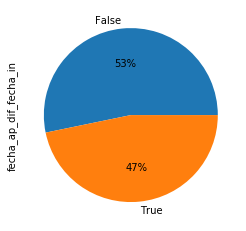

In [37]:
#Crear columna: fecha_apertura - fecha_inicio_sintomas 
dataset['fecha_ap_dif_fecha_in'] = dataset.fecha_apertura - dataset.fecha_inicio_sintomas 
dataset['fecha_ap_dif_fecha_in'].isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))
dataset['fecha_ap_dif_fecha_in'].isnull().value_counts()

True     2514888
False     172336
Name: fecha_int_dif_fecha_in, dtype: int64

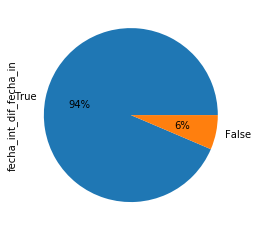

In [38]:
#Crear columna: fecha_internacion - fecha_inicio_sintomas 
dataset['fecha_int_dif_fecha_in'] = dataset.fecha_internacion - dataset.fecha_inicio_sintomas 
dataset['fecha_int_dif_fecha_in'].isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))
dataset['fecha_int_dif_fecha_in'].isnull().value_counts()

True     2660970
False      26254
Name: fecha_cui_dif_fecha_in, dtype: int64

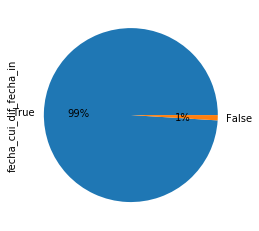

In [39]:
#Crear columna: fecha_cui_intensivo - fecha_inicio_sintomas 
dataset['fecha_cui_dif_fecha_in'] = dataset.fecha_cui_intensivo - dataset.fecha_inicio_sintomas 
dataset['fecha_cui_dif_fecha_in'].isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))
dataset['fecha_cui_dif_fecha_in'].isnull().value_counts()

True     1473419
False    1213805
Name: fecha_di_dif_fecha_in, dtype: int64

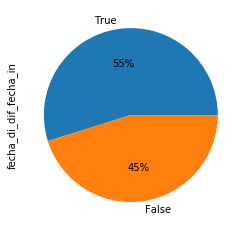

In [40]:
#Crear columna: fecha_diagnostico - fecha_inicio_sintomas 
dataset['fecha_di_dif_fecha_in'] = dataset.fecha_diagnostico  - dataset.fecha_inicio_sintomas 
dataset['fecha_di_dif_fecha_in'].isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))
dataset['fecha_di_dif_fecha_in'].isnull().value_counts()

#### fecha_apertura 

True     2499923
False     187301
Name: fecha_int_dif_fecha_ap, dtype: int64

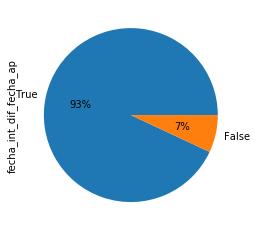

In [41]:
#Crear columna: fecha_internacion - fecha_apertura
dataset['fecha_int_dif_fecha_ap'] = dataset.fecha_internacion - dataset.fecha_apertura 
dataset['fecha_int_dif_fecha_ap'].isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))
dataset['fecha_int_dif_fecha_ap'].isnull().value_counts()

True     2659251
False      27973
Name: fecha_cui_dif_fecha_ap, dtype: int64

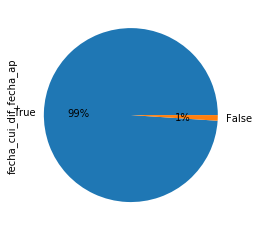

In [42]:
#Crear columna: fecha_cui_intensivo - fecha_apertura
dataset['fecha_cui_dif_fecha_ap'] = dataset.fecha_cui_intensivo - dataset.fecha_apertura
dataset['fecha_cui_dif_fecha_ap'].isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))
dataset['fecha_cui_dif_fecha_ap'].isnull().value_counts()

### Elegido: fecha_diagnostico - fecha_apertura

False    2249417
True      437807
Name: fecha_di_dif_fecha_ap, dtype: int64

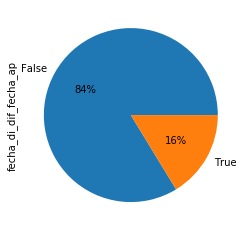

In [43]:
#Crear columna: fecha_diagnostico - fecha_apertura
dataset['fecha_di_dif_fecha_ap'] = dataset.fecha_diagnostico - dataset.fecha_apertura
dataset['fecha_di_dif_fecha_ap'].isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))
dataset['fecha_di_dif_fecha_ap'].isnull().value_counts()

#### fecha_internacion

True     2659793
False      27431
Name: fecha_cui_dif_fecha_int, dtype: int64

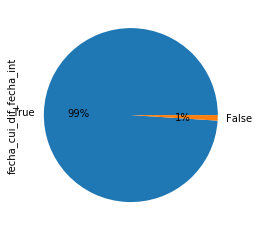

In [44]:
#Crear columna: fecha_cui_intensivo - fecha_internacion
dataset['fecha_cui_dif_fecha_int'] = dataset.fecha_cui_intensivo - dataset.fecha_internacion
dataset['fecha_cui_dif_fecha_int'].isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))
dataset['fecha_cui_dif_fecha_int'].isnull().value_counts()

True     2511812
False     175412
Name: fecha_di_dif_fecha_int, dtype: int64

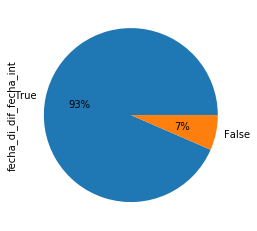

In [45]:
#Crear columna: fecha_diagnostico  - fecha_internacion
dataset['fecha_di_dif_fecha_int'] = dataset.fecha_diagnostico - dataset.fecha_internacion
dataset['fecha_di_dif_fecha_int'].isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))
dataset['fecha_di_dif_fecha_int'].isnull().value_counts()

#### fecha_cui_intensivo

True     2661000
False      26224
Name: fecha_di_dif_fecha_cui, dtype: int64

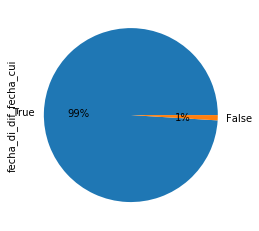

In [46]:
#Crear columna: fecha_cui_intensivo - fecha_apertura
dataset['fecha_di_dif_fecha_cui'] = dataset.fecha_diagnostico - dataset.fecha_cui_intensivo
dataset['fecha_di_dif_fecha_cui'].isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))
dataset['fecha_di_dif_fecha_cui'].isnull().value_counts()

#### Eliminamos las fechas que no vamos a usar: dejamos sólo la columna fecha_di_dif_fecha_ap

In [47]:
dataset.drop(['fecha_inicio_sintomas'], axis=1, inplace=True)
dataset.drop(['fecha_apertura'], axis=1, inplace=True)
dataset.drop(['fecha_internacion'], axis=1, inplace=True)
dataset.drop(['fecha_cui_intensivo'], axis=1, inplace=True)
dataset.drop(['fecha_diagnostico'], axis=1, inplace=True)
dataset.drop(['fecha_ap_dif_fecha_in'], axis=1, inplace=True)
dataset.drop(['fecha_int_dif_fecha_in'], axis=1, inplace=True)
dataset.drop(['fecha_cui_dif_fecha_in'], axis=1, inplace=True)
dataset.drop(['fecha_di_dif_fecha_in'], axis=1, inplace=True)
dataset.drop(['fecha_int_dif_fecha_ap'], axis=1, inplace=True)
dataset.drop(['fecha_cui_dif_fecha_ap'], axis=1, inplace=True)
dataset.drop(['fecha_cui_dif_fecha_int'], axis=1, inplace=True)
dataset.drop(['fecha_di_dif_fecha_int'], axis=1, inplace=True)
dataset.drop(['fecha_di_dif_fecha_cui'], axis=1, inplace=True)

dataset.drop(['ultima_actualizacion'], axis=1, inplace=True)

In [48]:
### Eliminamos la fecha de fallecido ya que si la variable target e4s fallecido, estaríamos introduciendo información a posteriori en el modelo
dataset.drop(['fecha_fallecimiento'], axis=1, inplace=True)

In [49]:
# Transformamos el valor de esta nueva característica en numérico
dataset['fecha_di_dif_fecha_ap'] = dataset['fecha_di_dif_fecha_ap'].astype('timedelta64[D]')

In [50]:
# Eliminamos los registros que no tienen valor en la columna fecha_di_dif_fecha_ap
dataset.drop(dataset[np.isnan(dataset.fecha_di_dif_fecha_ap)].index, inplace=True)

### sepi_apertura

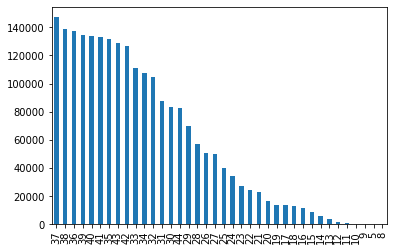

In [51]:
dataset.sepi_apertura.value_counts().plot.bar()

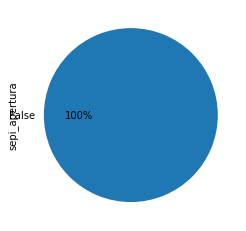

In [52]:
dataset.sepi_apertura.isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))

### cuidado_intensivo

In [53]:
dataset['cuidado_intensivo'].unique()

array(['NO', 'SI'], dtype=object)

In [54]:
# Binarización de la variable
dataset['cuidado_intensivo'] = (dataset['cuidado_intensivo'] == "SI")
dataset['cuidado_intensivo'] = dataset['cuidado_intensivo'].astype(int)

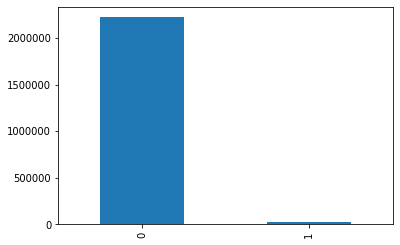

In [55]:
dataset.cuidado_intensivo.value_counts().plot.bar()

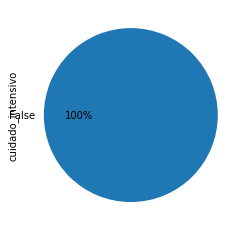

In [56]:
dataset.cuidado_intensivo.isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))

In [57]:
dataset.cuidado_intensivo.unique()

array([0, 1])

### asistencia_respiratoria_mecanica 

In [58]:
dataset['asistencia_respiratoria_mecanica'].unique()

array(['NO', 'SI'], dtype=object)

In [59]:
# Binarización de la variable
dataset['asistencia_respiratoria_mecanica'] = (dataset['asistencia_respiratoria_mecanica'] == "SI")
dataset['asistencia_respiratoria_mecanica'] = dataset['asistencia_respiratoria_mecanica'].astype(int)

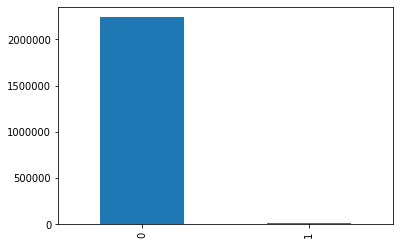

In [60]:
dataset.asistencia_respiratoria_mecanica.value_counts().plot.bar()

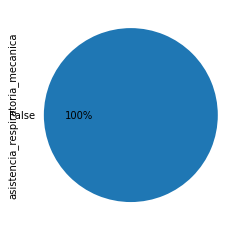

In [61]:
dataset.asistencia_respiratoria_mecanica.isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))

In [62]:
dataset.asistencia_respiratoria_mecanica.unique()

array([0, 1])

### origen_financiamiento

In [63]:
dataset.origen_financiamiento.unique()

array(['Privado', 'Público', '*sin dato*'], dtype=object)

In [64]:
dataset.drop(dataset[dataset.origen_financiamiento == "*sin dato*"].index, inplace=True)

In [65]:
dataset['origen_financiamiento'].unique()

array(['Privado', 'Público'], dtype=object)

In [66]:
# Binarización de la variable
dataset['origen_financiamiento'] = (dataset['origen_financiamiento'] == "Público")
dataset['origen_financiamiento'] = dataset['origen_financiamiento'].astype(int)

In [67]:
# cambio de nombre de la variable
dataset = dataset.rename(columns={"origen_financiamiento": "financiamiento_publico"})

1    1373403
0     875956
Name: financiamiento_publico, dtype: int64

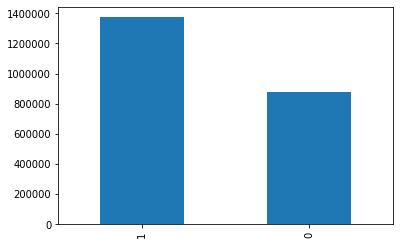

In [68]:
dataset.financiamiento_publico.value_counts().plot.bar()
dataset.financiamiento_publico.value_counts()

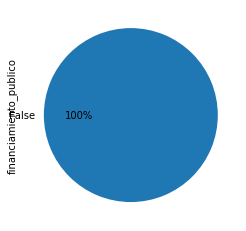

In [69]:
dataset.financiamiento_publico.isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))

### Clasificación (podría usarse como target)

Caso Descartado                                                                               1274885
Caso confirmado por laboratorio - No activo (por tiempo de evolución)                          780983
Caso confirmado por laboratorio - Activo Internado                                              77572
Caso confirmado por laboratorio - Activo                                                        46117
Caso confirmado por laboratorio - No Activo por criterio de laboratorio                         38806
Caso confirmado por laboratorio - Fallecido                                                     28148
Caso confirmado por criterio clínico-epidemiológico  - No activo (por tiempo de evolución)       2267
Caso confirmado por criterio clínico - epidemiológico -  Activo internado                         310
Caso confirmado por criterio clinico-epidemiológico - Activo                                      148
Caso confirmado por criterio clínico-epidemiologico - Fallecido                   

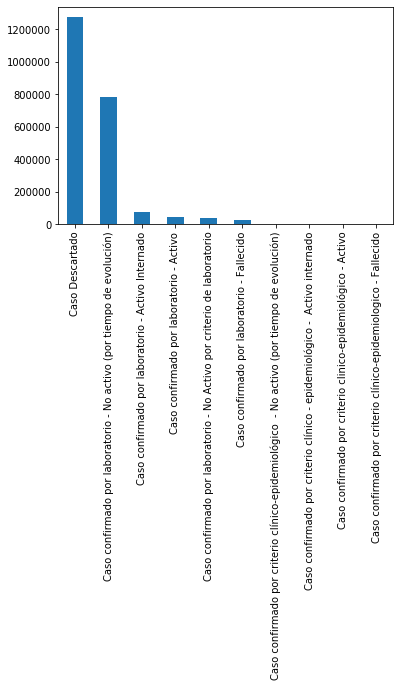

In [70]:
dataset.clasificacion.value_counts().plot.bar()
dataset.clasificacion.value_counts()

Descartado    1274885
Confirmado     974474
Name: clasificacion_resumen, dtype: int64

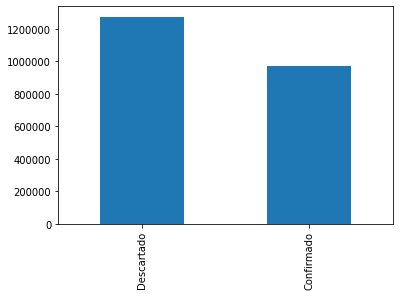

In [71]:
dataset.clasificacion_resumen.value_counts().plot.bar()
dataset.clasificacion_resumen.value_counts()

In [72]:
### Eliminamos los registros que tengan un valor diferente a Descartado o Confirmado (por si aparecen nuevos valores en el futuro)

dataset.drop(dataset[(dataset.clasificacion_resumen != "Descartado") & (dataset.clasificacion_resumen != "Confirmado")].index, inplace=True)

In [73]:
dataset.clasificacion_resumen.unique()

array(['Descartado', 'Confirmado'], dtype=object)

In [74]:
# Binarización de la variable
dataset['clasificacion_resumen'] = (dataset['clasificacion_resumen'] == "Confirmado")
dataset['clasificacion_resumen'] = dataset['clasificacion_resumen'].astype(int)

In [75]:
# cambio de nombre de la variable
dataset = dataset.rename(columns={"clasificacion_resumen": "covid_19_confirmado"})

0    1274885
1     974474
Name: covid_19_confirmado, dtype: int64

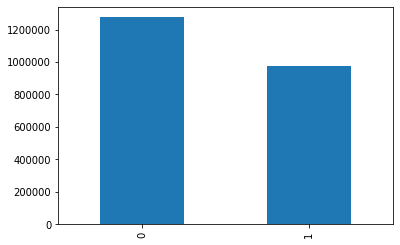

In [76]:
dataset.covid_19_confirmado.value_counts().plot.bar()
dataset.covid_19_confirmado.value_counts()

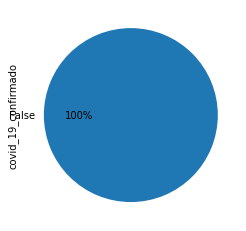

In [77]:
dataset.covid_19_confirmado.isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))

In [78]:
# Eliminamos la columna clasificacion
dataset.drop(['clasificacion'], axis=1, inplace=True)

### Fallecido (podría usarse como target)

In [79]:
dataset['fallecido'].unique()

array(['NO', 'SI'], dtype=object)

In [80]:
# Binarización de la variable
dataset['fallecido'] = (dataset['fallecido'] == "SI")
dataset['fallecido'] = dataset['fallecido'].astype(int)

0    2223311
1      26048
Name: cuidado_intensivo, dtype: int64


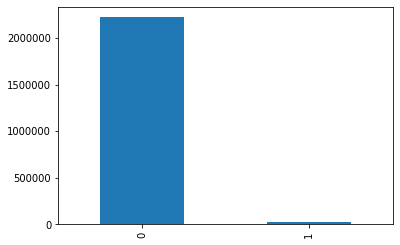

In [81]:
print(dataset.cuidado_intensivo.value_counts())
dataset.cuidado_intensivo.value_counts().plot.bar()

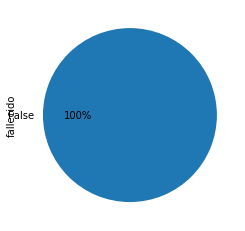

In [82]:
dataset.fallecido.isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))

### Eliminamos las columnas que no utilizamos

In [83]:
dataset.drop(['id_evento_caso'], axis=1, inplace=True)

## Dataset Limpio y Preprocesado

In [84]:
dataset = dataset.convert_dtypes()

In [85]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2249359 entries, 0 to 2807276
Data columns (total 36 columns):
 #   Column                                    Dtype
---  ------                                    -----
 0   edad                                      Int64
 1   sepi_apertura                             Int64
 2   cuidado_intensivo                         Int64
 3   fallecido                                 Int64
 4   asistencia_respiratoria_mecanica          Int64
 5   financiamiento_publico                    Int64
 6   covid_19_confirmado                       Int64
 7   sexo_f                                    UInt8
 8   sexo_m                                    UInt8
 9   sexo_nr                                   UInt8
 10  pcia_rec_eq_pcia_car                      Int64
 11  residencia_provincia_buenos_aires         UInt8
 12  residencia_provincia_caba                 UInt8
 13  residencia_provincia_catamarca            UInt8
 14  residencia_provincia_chaco        

In [86]:
dataset

,edad,sepi_apertura,cuidado_intensivo,fallecido,asistencia_respiratoria_mecanica,financiamiento_publico,covid_19_confirmado,sexo_f,sexo_m,sexo_nr,...,residencia_provincia_rio_negro,residencia_provincia_salta,residencia_provincia_san_juan,residencia_provincia_san_luis,residencia_provincia_santa_cruz,residencia_provincia_santa_fe,residencia_provincia_santiago_del_estero,residencia_provincia_tierra_del_fuego,residencia_provincia_tucuman,fecha_di_dif_fecha_ap
0,53,23,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,8
1,21,23,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,40,23,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,58,23,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,26,23,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807272,39,23,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2807273,34,23,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,11
2807274,42,23,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2807275,30,23,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


### Guardamos el dataset limpio y preprocesado

In [87]:
PATH = "./data/"
FILE_NAME = 'covid19_limpio.csv'
FULL_NAME = PATH + FILE_NAME

In [89]:
dataset.to_csv(FULL_NAME, index=False)